In [70]:
import os
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import color
import numpy as np

from test_model import Model

ModuleNotFoundError: No module named 'color'

In [3]:
root = "/home/eirik/data/pusher_models/"
os.listdir(root)

['max_ep_200',
 'run_step_300_4',
 'run_step_300_3',
 'run_step_300_2',
 'run_step_200',
 'run_step_300',
 'run_step_100']

In [91]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def generate_latex_color(name):
    r = np.random.randint(0, 255)
    g = np.random.randint(0, 255)
    b = np.random.randint(0, 255)
    
    inp = [name, "RGB"]

    l = "\\definecolor{"
    l += f"{inp[0]}"
    l += "}{"
    l += f"{inp[1]}"
    l += "}{"
    l += f"{r}, {g}, {b}"
    l += "}"

    # print(l)
    
    return l


for i in range(100):

    generate_latex_color(f"color{i}")

eval score : -0.12800937182832917
success rate : 0.84


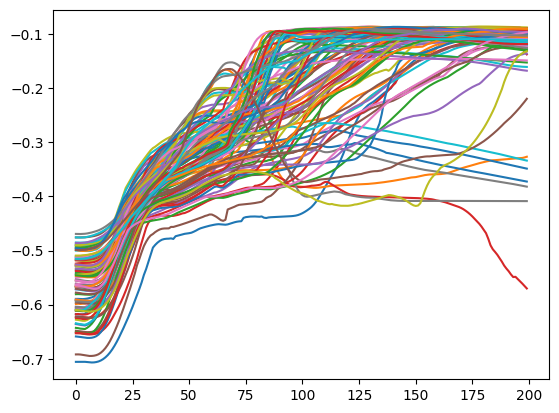

In [126]:
root = "/home/eirik/data/pusher_models/"
model_name = "max_ep_200"
root = os.path.join(root, model_name)

modelname = f"{model_name}_40000.pt"
modelpath = os.path.join(root, modelname)

model = Model(path_model=modelpath, render=0, max_steps=200)


N_SEEDS = 100

seeds = [i for i in range(N_SEEDS)]
rewards, success = model.test(seeds, show_progress=False)

r_t = []
latex_full = """"""
style = "thick"
coloridx = np.random.choice(range(100), N_SEEDS, replace=False)
for (y,s, cid) in zip(rewards, seeds, coloridx):

    cid = int(cid)
    # y = moving_average(y, n=20)
    x = [i for i in range(len(y))]
    r_t.append(y[-1])
    plt.plot(x,y)

    latex = ""

    for x_i, y_i in zip(x, y):
        latex += f"({x_i}, {y_i})"

    color = f"color{cid}"
    latex_full += f"""\\addplot[
                    color={color},
                    style={style}
                    ]
                    coordinates
                """

    latex_full += " "
    latex_full += "{"
    latex_full += latex
    latex_full += "};"
    latex_full += "\n"
    
print(f"eval score : {np.mean(r_t)}")
print(f"success rate : {success}")

In [124]:
print(latex_full)

\addplot[
                    color=color12,
                    style=thick
                    ]
                    coordinates
                 {(0, -0.7057309119890243)(1, -0.7056706766851791)(2, -0.7056386073912917)(3, -0.7056348967775563)(4, -0.7056697234841877)(5, -0.7060776259557471)(6, -0.7065843354243488)(7, -0.7068757668948196)(8, -0.7067124608388631)(9, -0.7060898693957164)(10, -0.7049906669049884)(11, -0.7031971049640611)(12, -0.7007246521402586)(13, -0.6975208783442504)(14, -0.6935320546928485)(15, -0.6887092526806073)(16, -0.6829451120718659)(17, -0.6763403667661925)(18, -0.6689572640190907)(19, -0.6608457571355284)(20, -0.6520889636813755)(21, -0.6432150155971034)(22, -0.6340559801118122)(23, -0.6244673759999302)(24, -0.6145589325739991)(25, -0.6041467562443408)(26, -0.5932715821976362)(27, -0.5824171546351665)(28, -0.5710899450882114)(29, -0.5591184392370655)(30, -0.5452645512822858)(31, -0.5342108601659519)(32, -0.520991776822238)(33, -0.507854220919703)(34, -0.49465

In [40]:
T

NameError: name 'T' is not defined